In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from six.moves import urllib

warnings.filterwarnings('ignore')

%matplotlib inline

# Read Data

In [2]:
Data = pd.read_csv('car data.csv')

In [3]:
Data

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,honda,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Top 5 Records

In [4]:
Data.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Shape of the dataset

In [5]:
Data.shape

(301, 10)

301 is the number of records.
10 is the number of features.

# Summary of the dataset

In [6]:
Data.info() # Check Null values and Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


# Explore the dataset

In [7]:

numeric_features = [feature for feature in Data.columns if Data[feature].dtype != 'O']
categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']


In [8]:
numeric_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [9]:
categorical_features

['Car_Name', 'company', 'Fuel_Type', 'Seller_Type', 'Transmission']

# Features Information 

Car_Name: This column likely contains the names or identifiers of the cars.

company: This column appears to contain the company or manufacturer name of the car.

Year: Represents the manufacturing year of the car. It is of integer type (int64).

Selling_Price: Indicates the selling price of the car. It is of float type (float64).

Present_Price: Represents the present price or current market value of the car. It is also of float type (float64).

Kms_Driven: Denotes the total kilometers the car has been driven. It is of integer type (int64).

Fuel_Type: Specifies the type of fuel the car uses, which can be categorical (object) data. Common values might include 'Petrol', 'Diesel', or 'CNG'.

Seller_Type: Represents the type of seller, possibly indicating whether the seller is an individual or a dealer. It is likely a categorical feature (object).

Transmission: Describes the type of transmission the car has, such as 'Manual' or 'Automatic'. It is also likely a categorical feature (object).

Owner: Represents the number of previous owners of the car. It is of integer type (int64).

# Proportion of count data on categorical columns in Percentage

In [10]:
for col in categorical_features:
    print(Data[col].value_counts(normalize=True) * 100)
    print('--------------------------------')

city                        8.637874
corolla altis               5.315615
verna                       4.651163
fortuner                    3.654485
brio                        3.322259
                              ...   
Honda CB Trigger            0.332226
Yamaha FZ S                 0.332226
Bajaj Pulsar 135 LS         0.332226
Activa 4g                   0.332226
Bajaj Avenger Street 220    0.332226
Name: Car_Name, Length: 98, dtype: float64
--------------------------------
honda            23.255814
maruti suzuki    16.611296
hyndai           16.611296
other            12.956811
toyota           11.960133
bajaj             8.305648
hero              4.983389
yamaha            2.657807
tvs               2.657807
Name: company, dtype: float64
--------------------------------
Petrol    79.401993
Diesel    19.933555
CNG        0.664452
Name: Fuel_Type, dtype: float64
--------------------------------
Dealer        64.784053
Individual    35.215947
Name: Seller_Type, dtype: float64
----

# Univariate Analysis

Univariate analysis involves the examination of a single variable at a time. Here, we'll consider various univariate analyses that can be applied to the features in your car dataset. The specific analysis depends on whether the variable is numerical or categorical.
Numerical Variables:

    Year:
        Histogram: Visualize the distribution of car manufacturing years.
        Summary Statistics: Calculate mean, median, standard deviation, etc.

    Selling_Price and Present_Price:
        Histogram: Understand the distribution of selling prices and present prices.
        Box Plot: Detect outliers and understand the spread of prices.

    Kms_Driven:
        Histogram: Examine the distribution of kilometers driven.
        Summary Statistics: Understand the central tendency and spread.

    Owner:
        Count Plot: Visualize the distribution of the number of owners.
        Value Counts: Get the count of unique owner values.

Categorical Variables:

    Fuel_Type, Seller_Type, Transmission:
        Count Plot: Visualize the distribution of different fuel types, seller types, and transmission types.

    Car_Name and Company:
        Value Counts: Count the occurrences of each car name and company.

Combined Analysis:

    Year vs. Selling_Price:
        Scatter Plot: Understand how selling prices vary with the manufacturing year.

    Fuel_Type vs. Present_Price:
        Box Plot: Visualize how the present prices vary for different fuel types.

    Transmission vs. Kms_Driven:
        Violin Plot: Explore the distribution of kilometers driven for different transmission types.

# Numerical Variables

In [11]:

# Histogram for Year
fig_year = px.histogram(Data, x='Year', nbins=20, title='Distribution of Car Manufacturing Years',
                        labels={'Year': 'Manufacturing Year', 'count': 'Frequency'},
                        color_discrete_sequence=['#87CEFA'])
fig_year.update_layout(xaxis_title='Manufacturing Year', yaxis_title='Frequency')

# Show the histogram
fig_year.show()

# Summary Statistics for Year
year_mean = Data['Year'].mean()
year_median = Data['Year'].median()
year_std = Data['Year'].std()

print(f"Mean Year: {year_mean}")
print(f"Median Year: {year_median}")
print(f"Standard Deviation of Year: {year_std}")


Mean Year: 2013.6279069767443
Median Year: 2014.0
Standard Deviation of Year: 2.891554127336682


In [12]:

# Histograms for Selling_Price and Present_Price
fig_prices = px.histogram(Data, x=['Selling_Price', 'Present_Price'], nbins=20,
                          title='Distribution of Selling Prices and Present Prices',
                          labels={'value': 'Price', 'variable': 'Variable'},
                          color_discrete_sequence=['#87CEFA', '#90EE90'])
fig_prices.update_layout(xaxis_title='Price', yaxis_title='Frequency')

# Box Plot for Selling_Price and Present_Price
fig_box_plot = px.box(Data.melt(value_vars=['Selling_Price', 'Present_Price']), x='variable', y='value',
                      title='Box Plot of Selling Prices and Present Prices',
                      labels={'value': 'Price', 'variable': 'Variable'},
                      color_discrete_sequence=['#87CEFA', '#90EE90'])
fig_box_plot.update_layout(xaxis_title='Variable', yaxis_title='Price')

# Show the plots
fig_prices.show()
fig_box_plot.show()


In [13]:

# Histogram for Kms_Driven
fig_kms_driven = px.histogram(Data, x='Kms_Driven', nbins=20, title='Distribution of Kilometers Driven',
                               labels={'Kms_Driven': 'Kilometers Driven', 'count': 'Frequency'},
                               color_discrete_sequence=['#ff7f0e'])
fig_kms_driven.update_layout(xaxis_title='Kilometers Driven', yaxis_title='Frequency')

# Show the histogram
fig_kms_driven.show()

# Summary Statistics for Kms_Driven
kms_mean = Data['Kms_Driven'].mean()
kms_median = Data['Kms_Driven'].median()
kms_std = Data['Kms_Driven'].std()

print(f"Mean Kilometers Driven: {kms_mean}")
print(f"Median Kilometers Driven: {kms_median}")
print(f"Standard Deviation of Kilometers Driven: {kms_std}")


Mean Kilometers Driven: 36947.20598006644
Median Kilometers Driven: 32000.0
Standard Deviation of Kilometers Driven: 38886.88388206788


In [14]:
# Count Plot for Owner
fig_owner = px.histogram(Data, x='Owner', title='Distribution of Number of Owners',
                         labels={'Owner': 'Number of Owners', 'count': 'Count'},
                         color_discrete_sequence=['#8dd3c7'])
fig_owner.update_layout(xaxis_title='Number of Owners', yaxis_title='Count')

# Show the plot
fig_owner.show()

# Value Counts for Owner
owner_counts = Data['Owner'].value_counts().reset_index()
owner_counts.columns = ['Number of Owners', 'Count']
print("Value Counts for Number of Owners:")
print(owner_counts)

Value Counts for Number of Owners:
   Number of Owners  Count
0                 0    290
1                 1     10
2                 3      1


# Categorical Variables

In [15]:

# Count Plot for Fuel_Type
fig_fuel_type = px.histogram(Data, x='Fuel_Type', title='Distribution of Fuel Types',
                              labels={'Fuel_Type': 'Fuel Type', 'count': 'Count'},
                              category_orders={'Fuel_Type': ['Petrol', 'Diesel', 'CNG']},
                              color_discrete_sequence=['#66c2a5'])
fig_fuel_type.update_layout(xaxis_title='Fuel Type', yaxis_title='Count')

# Count Plot for Seller_Type
fig_seller_type = px.histogram(Data, x='Seller_Type', title='Distribution of Seller Types',
                                labels={'Seller_Type': 'Seller Type', 'count': 'Count'},
                                color_discrete_sequence=['#fc8d62'])
fig_seller_type.update_layout(xaxis_title='Seller Type', yaxis_title='Count')

# Count Plot for Transmission
fig_transmission = px.histogram(Data, x='Transmission', title='Distribution of Transmission Types',
                                 labels={'Transmission': 'Transmission Type', 'count': 'Count'},
                                 color_discrete_sequence=['#8da0cb'])
fig_transmission.update_layout(xaxis_title='Transmission Type', yaxis_title='Count')

# Show the plots
fig_fuel_type.show()
fig_seller_type.show()
fig_transmission.show()


In [16]:

# Value Counts for Car Names
car_name_counts = Data['Car_Name'].value_counts().reset_index()
car_name_counts.columns = ['Car_Name', 'Count']

# Value Counts for Companies
company_counts = Data['company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Count']

# Bar Chart for Car Names
fig_car_names = px.bar(car_name_counts, x='Car_Name', y='Count', title='Value Counts for Car Names',
                       labels={'Car_Name': 'Car Name', 'Count': 'Count'})

# Bar Chart for Companies
fig_companies = px.bar(company_counts, x='Company', y='Count', title='Value Counts for Companies',
                       labels={'Company': 'Company', 'Count': 'Count'})

# Show the plots
fig_car_names.show()
fig_companies.show()


# Combined Analysis

In [17]:
# Scatter Plot: Year vs. Selling_Price
fig = px.scatter(Data, x='Year', y='Selling_Price', color='Selling_Price',
                 title='Year vs. Selling Price',
                 labels={'Year': 'Manufacturing Year', 'Selling_Price': 'Selling Price'})

fig.update_layout(xaxis_title='Manufacturing Year', yaxis_title='Selling Price')
fig.show()

In [18]:
# Box Plot: Fuel_Type vs. Present_Price
fig = px.box(Data, x='Fuel_Type', y='Present_Price', color='Fuel_Type',
             title='Present Prices vs. Fuel Type',
             labels={'Present_Price': 'Present Price', 'Fuel_Type': 'Fuel Type'})

fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Present Price')
fig.show()

In [19]:
# Violin Plot: Transmission vs. Kms_Driven
fig = px.violin(Data, x='Transmission', y='Kms_Driven', box=True, points="all",
                title='Distribution of Kilometers Driven by Transmission Type',
                labels={'Kms_Driven': 'Kilometers Driven', 'Transmission': 'Transmission Type'})

fig.update_layout(xaxis_title='Transmission Type', yaxis_title='Kilometers Driven')
fig.show()

# Multivariate Analysis

Multivariate analysis involves examining the relationships between multiple variables simultaneously. This type of analysis helps uncover patterns, associations, and interactions among variables. 

Correlation Matrix:

    A correlation matrix helps identify linear relationships between pairs of numerical variables. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values near zero indicate a weak or no correlation.

<Axes: >

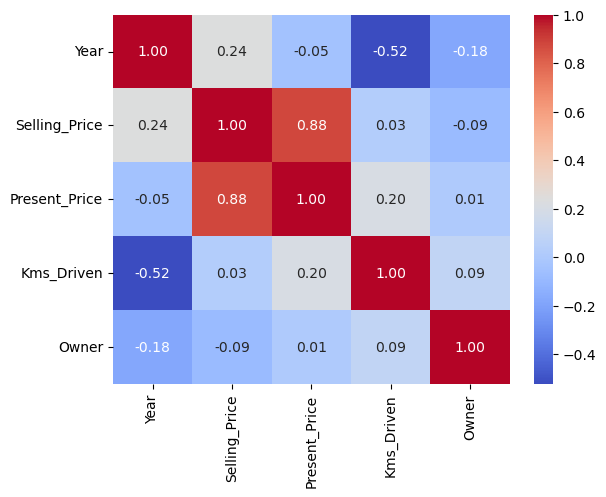

In [20]:
correlation_matrix = Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


Pair Plots:

    Pair plots are useful for visualizing relationships between numerical variables. Each scatter plot in the matrix represents the relationship between two variables, and histograms along the diagonal show the distribution of each variable.

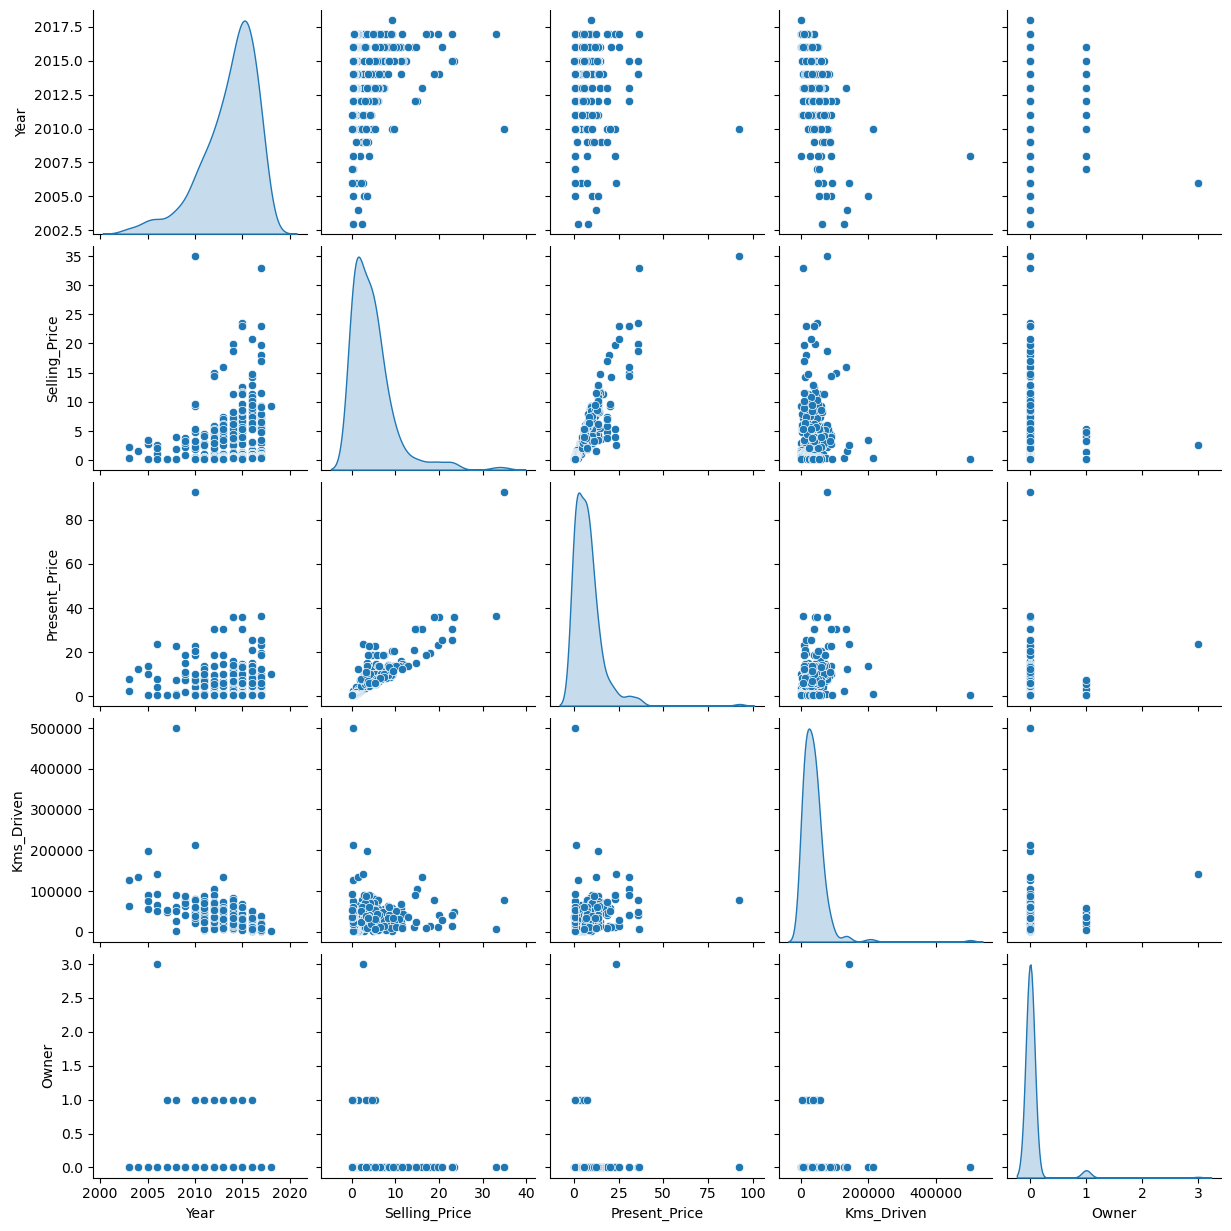

In [21]:
sns.pairplot(Data, diag_kind='kde')

Scatter Matrix:

    Similar to pair plots, a scatter matrix provides scatter plots for numerical variables. It can be helpful when you have more than two numerical variables.

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Selling_Price', ylabel='Year'>,
        <Axes: xlabel='Present_Price', ylabel='Year'>,
        <Axes: xlabel='Kms_Driven', ylabel='Year'>,
        <Axes: xlabel='Owner', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Selling_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>,
        <Axes: xlabel='Owner', ylabel='Selling_Price'>],
       [<Axes: xlabel='Year', ylabel='Present_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Present_Price'>,
        <Axes: xlabel='Owner', ylabel='Present_Price'>],
       [<Axes: xlabel='Year', ylabel='Kms_Driven'>,
        <Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>,
        <Axes: xlabel='Presen

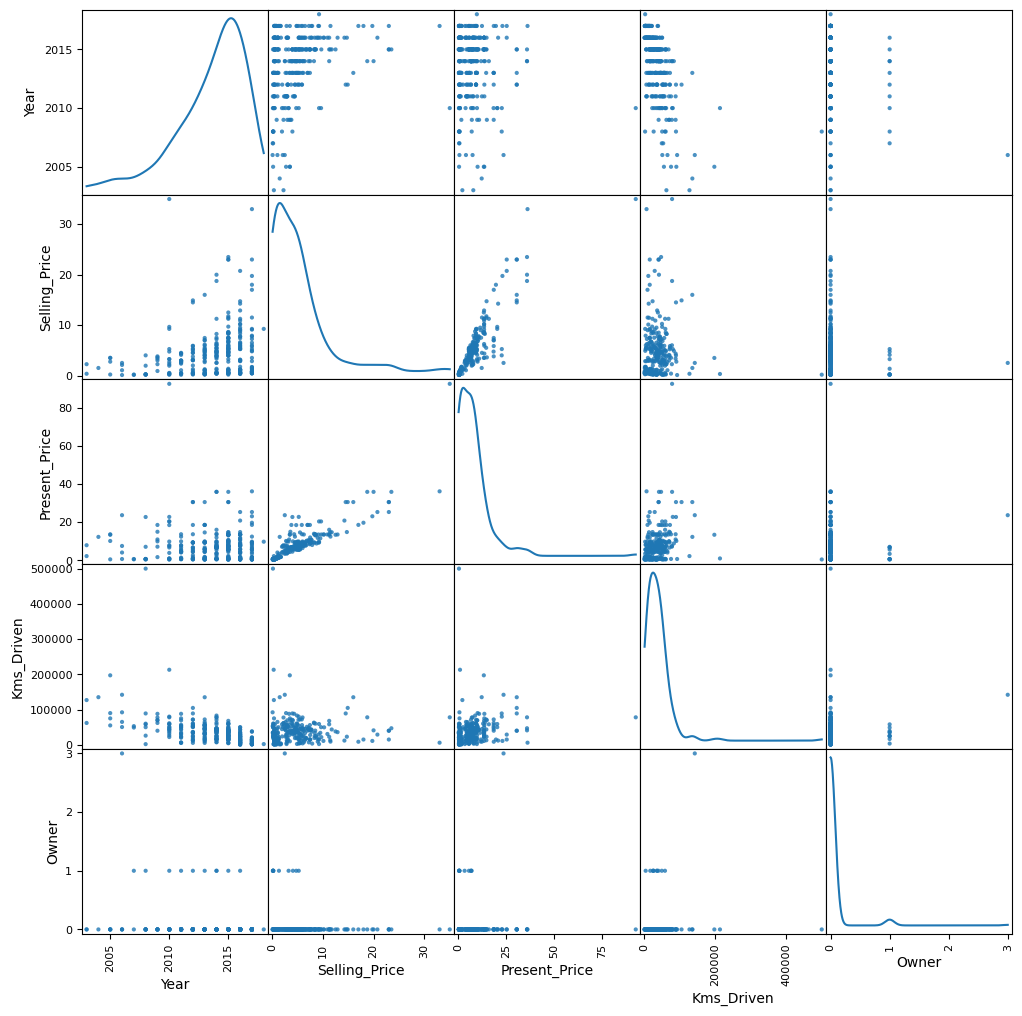

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(Data, alpha=0.8, figsize=(12, 12), diagonal='kde')


Box Plots with Categorical Variables:

    Box plots can be used to compare the distribution of numerical variables across different categories.

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

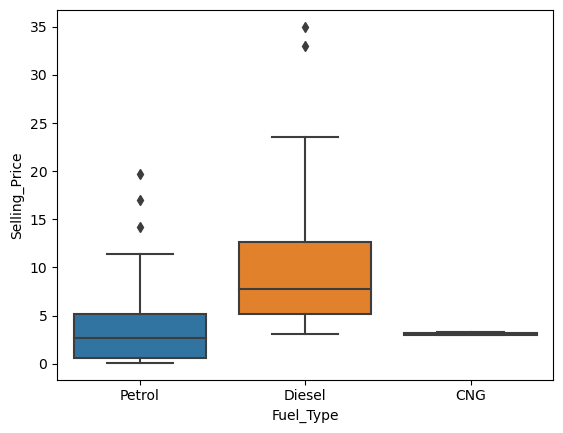

In [23]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=Data)


3D Scatter Plots:

    3D scatter plots are useful when you want to visualize the relationship between three numerical variables.

In [24]:
fig_3d = px.scatter_3d(Data, x='Year', y='Selling_Price', z='Kms_Driven', color='Fuel_Type')
fig_3d.show()


Categorical Plots with Two Variables:

    These plots help visualize the relationships between two categorical variables.

<Axes: xlabel='Fuel_Type', ylabel='count'>

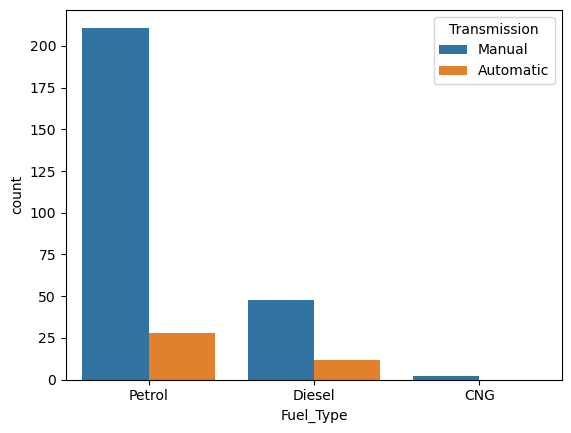

In [25]:
sns.countplot(x='Fuel_Type', hue='Transmission', data=Data)
